In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
img = []
label = []
input_size = 64
for i in os.listdir("C:/Users/thaca/Downloads/MRI/1"):
    img_path = os.path.join("C:/Users/thaca/Downloads/MRI/1", i)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (input_size, input_size))
    img.append(image)
    label.append(1)

for i in os.listdir("C:/Users/thaca/Downloads/MRI/0"):
    img_path = os.path.join("C:/Users/thaca/Downloads/MRI/0", i)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (input_size, input_size))
    img.append(image)
    label.append(0)


In [21]:
len(img)
len(label)

3554

In [22]:
X = np.array(img) / 255.0
y = np.array(label)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10


C:\Users\thaca\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5425 - loss: 0.6891 - val_accuracy: 0.5274 - val_loss: 0.6563
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6810 - loss: 0.5842 - val_accuracy: 0.8734 - val_loss: 0.3619
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8806 - loss: 0.3033 - val_accuracy: 0.8903 - val_loss: 0.2612
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9264 - loss: 0.2000 - val_accuracy: 0.9311 - val_loss: 0.1725
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9492 - loss: 0.1456 - val_accuracy: 0.9395 - val_loss: 0.1946
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9575 - loss: 0.1216 - val_accuracy: 0.9536 - val_loss: 0.1400
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9666 - loss: 0.1072 - val_accuracy: 0.9606 - val_loss: 0.1639
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9761 - loss: 0.0648 - val_accuracy: 0.9634 - val_loss: 0.

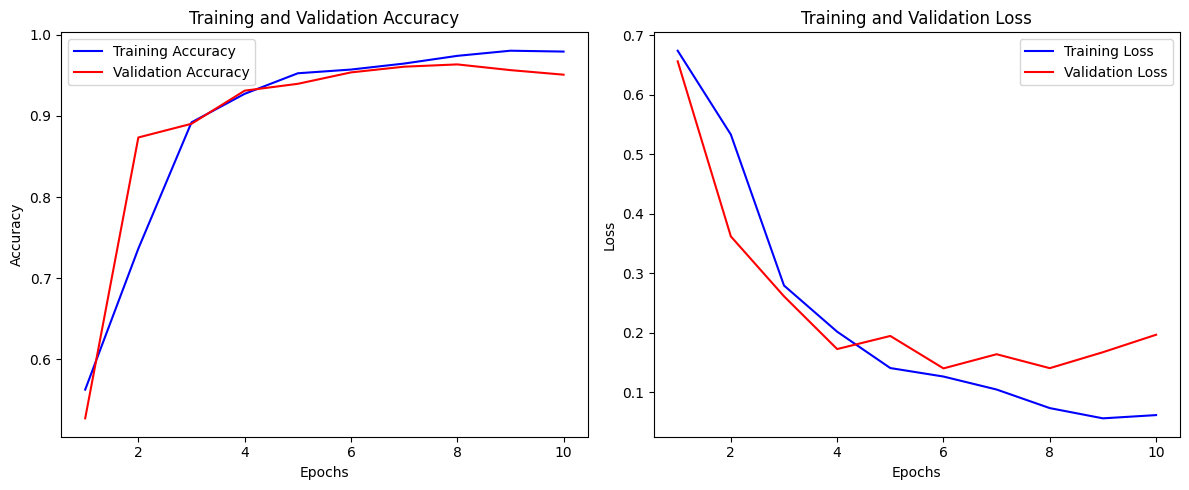


Kết quả trên tập validation:
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9560 - loss: 0.1835
Accuracy: 0.9508
Loss: 0.1966


In [24]:
model = Sequential()
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training mô hình
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Vẽ đồ thị kết quả
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Đồ thị accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Đồ thị loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

print("\nKết quả trên tập validation:")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Loss: {val_loss:.4f}")

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049,989 (7.82 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,366,660 (5.21 MB)

In [26]:
model.save('MRI.keras')

In [35]:
cnt = 0
for i in os.listdir("C:/Users/thaca/Downloads/MRI/test_1"):
    img = cv2.imread(f'C:/Users/thaca/Downloads/MRI/test_1/{i}')
    img = cv2.resize(img, (input_size, input_size))
    img_normalized = img / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)
    prediction = model.predict(img_batch)
    if(prediction > 0.5): cnt += 1
print(cnt/len(os.listdir("C:/Users/thaca/Downloads/MRI/test_1")))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━

In [36]:
cnt = 0
for i in os.listdir("C:/Users/thaca/Downloads/MRI/test_0"):
    img = cv2.imread(f'C:/Users/thaca/Downloads/MRI/test_0/{i}')
    img = cv2.resize(img, (input_size, input_size))
    img_normalized = img / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)
    prediction = model.predict(img_batch)
    if(prediction <= 0.5): cnt += 1
print(cnt/len(os.listdir("C:/Users/thaca/Downloads/MRI/test_0")))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━